<br/>
<img src="images/cd-logo-blue-600x600.png" alt="" width="130px" align="left"/>
<img src="images/cd-logo-blue-600x600.png" alt="" width="130px" align="right"/>
<div align="center">
<h2>Bootcamp Data Science - Módulo 3</h2><br/>
<h1>Introducción a Redes Neuronales y DeepLearning</h1>
<br/><br/>
    <b>Instructor Principal:</b> Patricio Olivares polivares@codingdojo.cl <br/>
    <b>Instructor Asistente:</b> Jesús Ortiz jortiz@codingdojo.cl<br/><br/>
    <b>Coding Dojo</b>
</div>
<br>
Fuente: "Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow"

# Redes neuronales (Neural Networks - NN)

- Las Redes Neuronales son un conjunto de modelos de Machine Learning.
- Estas se inspiran en el funcionamiento neurológico del cerebro humano.
- Las redes neuronales han sido utilizadas en múltiples y diferentes áreas de aplicación

### Ejemplos de aplicaciones Deep Learning

- [DeepMind](https://www.youtube.com/watch?v=V1eYniJ0Rnk)
- [YoloV3](https://www.youtube.com/watch?v=MPU2HistivI)
- [QuickDraw](https://quickdraw.withgoogle.com/#)
- [Rock-Paper-Scisors](https://tenso.rs/demos/rock-paper-scissors/)
- [ChatGPT](https://chat.openai.com/)
- Y una laaaarga [lista](https://www.mygreatlearning.com/blog/deep-learning-applications/#deepdreaming)

# Perceptrón

- Es la red neuronal más sencilla cuya base es la TLU (Threshold Logic Unit)
- TLU es una neurona artificial que opera de la siguiente manera
    - Recibe una o varias entradas numéricas $(x_1, x_2, ..., x_n)$
    - Cada entrada es ponderada por un peso $(w_1x_1, w_2x_2, ..., w_nx_n)$
    - Se calcula la suma ponderada de las entradas $z=w_1x_1 + w_2x_2 + ... +w_nx_n $
    - Al resultado de la suma ponderada se le aplica una función escalonada $h_w(x)=\text{step}(z)$. Esta es nuestra predicción
- Al entrenar una neurona, lo que se intenta determinar son los **pesos** $w$ tales que la predicción $h_w(x)$ sea lo más cercana al valor real

<img src="images/perceptron.png" width="700px">

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

# iris = load_iris()
# X = iris.data[:,(2,3)] # Largo y ancho del pétalo
# y = (iris.target == 0) # Iris setosa?

cancer_data = load_breast_cancer()
X = cancer_data.data
y = cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

per = Perceptron()
per.fit(X_train, y_train)
print("Training score:", per.score(X_train, y_train))
print("Test score:", per.score(X_test, y_test))

Training score: 0.9271356783919598
Test score: 0.8830409356725146


In [2]:
from sklearn.linear_model import LogisticRegression

# Comparación con Regresión Logística
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Training score:", logreg.score(X_train, y_train))
print("Test score:", logreg.score(X_test, y_test))


Training score: 0.9547738693467337
Test score: 0.9415204678362573


/home/polivares/miniforge3/envs/DataScience/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Redes multicapas y Deep Learning

- Es posible conectar múltiples neuronas entre sí tomamos la salida de una neurona como la entrada para una o múltiples neuronas adicionales.
- Las conexiones que se producen entre neuronas conforman lo que se llama como **red neuronal**.
- Dependiendo de cuales sean las conexiones entre distintas neuronas, se habla de la **arquitectura** de la red neuronal.
- Las redes neuronales se dividen en **capas**, las cuales se dividen en las siguientes categorías:
    - Capas de entrada (input layers)
    - Capas de salida (output layers)
    - Capas ocultas/intermedias (hidden layers)
- Las redes multicapas están compuestas por una capa de entrada, una o varias capas ocultas y una capa de salida
- Cuando una red multicapa contiene muchas capas ocultas, hablamos de una **Red Neuronal Profunda** (Deep Neural Network - DNN)

<img src="images/dnn.png" width="700px">

- Al igual que en el perceptron, deseamos calcular los pesos $w$ de todas las neuronas tales que la salida esté lo más cercana a los valores esperados. 
- ¿Cómo podemos calcular tantos pesos a la vez? 
    - **R:** Backpropagation (para quienes estén interesados en estudiar más a fondo, pueden buscar el algoritmo de Descenso del Gradiente/Gradient Descent)

# Bibliotecas de Deep Learning

- Actualmente existe una amplia gama de bibliotecas para Deep Learning. 
- Por su facilidad de uso y popularidad, utilizaremos la API de **Keras**, la cual viene incluida dentro de la biblioteca **Tensorflow**.
- Para poder utilizar Keras, es necesario tener previamente instalado Tensorflow (```pip install tensorflow```)

<img src="images/bibliotecas.png" width="700px">

# Creando redes neuronales en Keras

Para crear una red neuronal, debemos
- Definir la arquitectura de la red (modelo y capas)
- Compilar el modelo (selección de optimizador, función de pérdida y métricas)
- Entrenar modelo
- Usar!

In [1]:
import tensorflow as tf
print(tf.__version__)

2024-01-23 21:42:30.918928: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-23 21:42:31.120082: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-23 21:42:31.120150: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-23 21:42:31.120899: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-23 21:42:31.218386: I tensorflow/core/platform/cpu_feature_g

2.14.1


In [2]:
# Ejemplo usando fashion mnist
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Cost",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"] # 10 clases

X_train_full = X_train_full/255.0 # Escalamiento

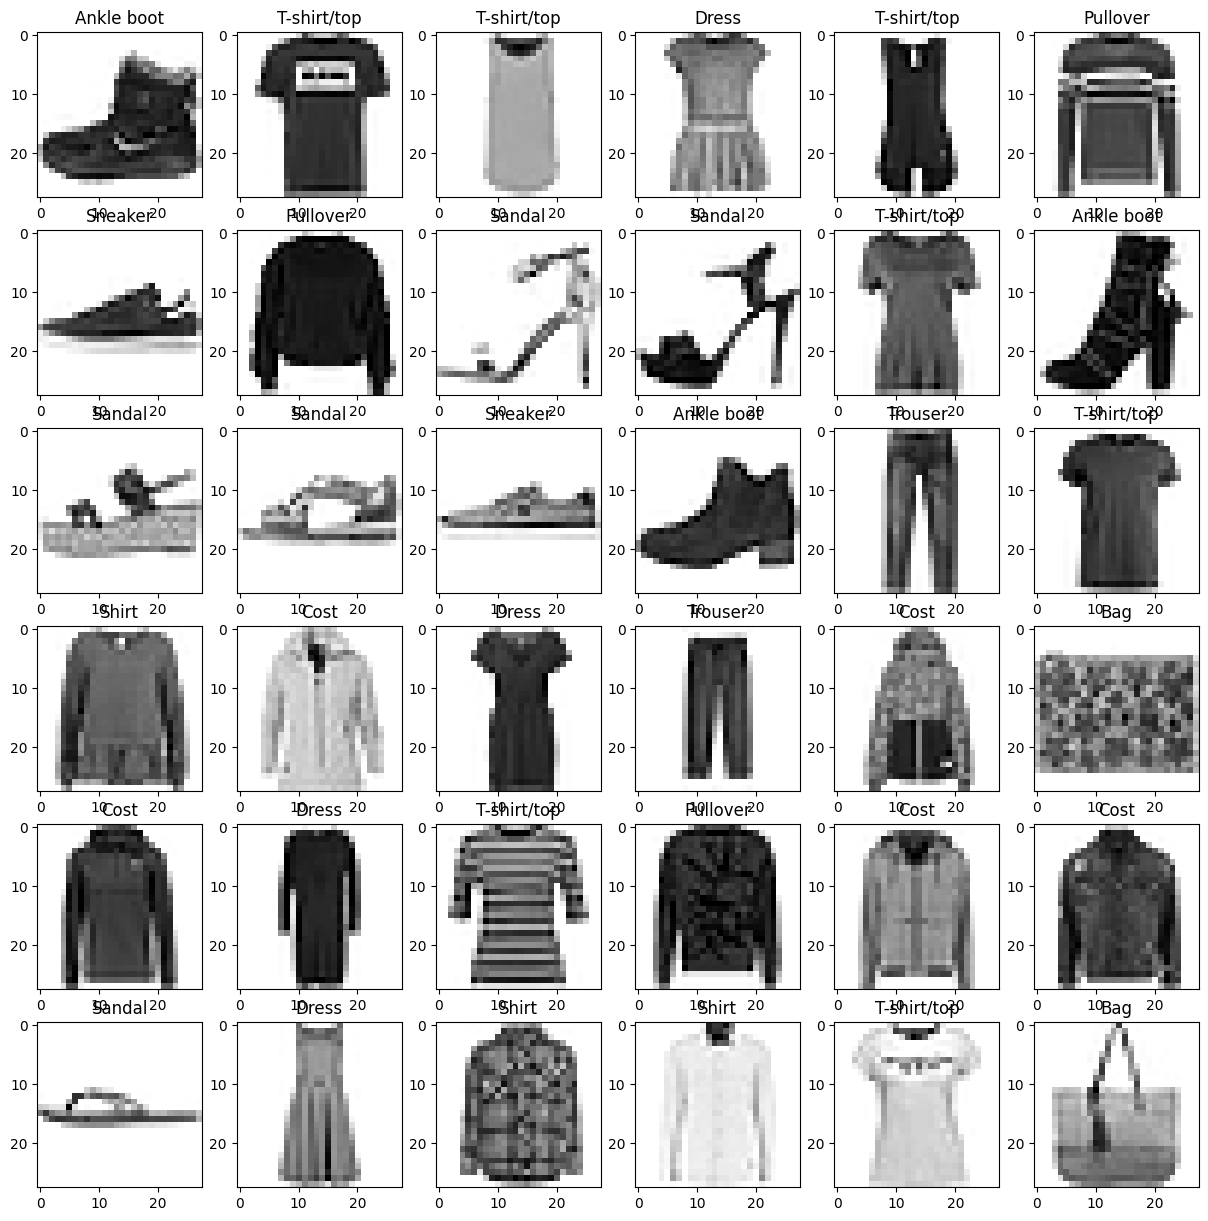

In [3]:
# Esta celda muestra algunas imágenes del dataset como ejemplo
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,15))

for i in range(36):
    ax = fig.add_subplot(6,6,i+1)
    ax.imshow(X_train_full[i], cmap='gist_yarg')
    ax.set_title(class_names[y_train_full[i]])

plt.show()
    

In [4]:
# Acá armaremos nuestra red neuronal (la arquitectura)
# Recuerda que en este punto se debe escoger tanto el modelo, la cantidad de capas, el tipo de capas,
# cantidad de neuronas, etc.
# Armado de nuestra red neuronal
model = tf.keras.models.Sequential() # Modelo secuencial
model.add(tf.keras.layers.Flatten(input_shape=[28, 28])) # Capa de entrada, tiene dimensiones 28x28
model.add(tf.keras.layers.Dense(300, activation='relu')) # Primera capa oculta, salida 300
model.add(tf.keras.layers.Dense(100, activation='relu')) # Segunda capa oculta, salida 100
model.add(tf.keras.layers.Dense(10, activation='softmax')) # Capa de salida, salida 10 (número de clases)
# Importante 
# -Para un modelo de clasificación multiclase debes tener tantas neuronas en la capa de salida como clases tenga
# tu dataset
# - La función de activación DEBE ser softmax de la capa de salida

2024-01-23 22:16:11.160414: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-23 22:16:11.302347: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-23 22:16:11.302822: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [5]:
# Red creada
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# En el proceso de compilación, la función de perdida DEBE ser sparse_categorical_crossentropy
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd", # Existen principalmente dos optimizadores, adam y sgd. En la práctica, escoger uno u otro no hace gran diferencia
              metrics=["accuracy"])





# Ejemplos de métricas
# metrics=[tf.keras.metrics.Accuracy(), tf.keras.metrics.FalsePositives()]

In [7]:
from sklearn.model_selection import train_test_split
# Utilización de datos de validación y entrenamiento del modelo
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, 
                                                  stratify=y_train_full)

In [8]:
# Proceso de entrenamiento de la red neuronal (se realiza con un fit() igual que en sklearn)
history = model.fit(X_train, y_train, epochs=30, batch_size=10000,
                    validation_data=(X_val, y_val))

Epoch 1/30


2024-01-23 22:31:48.081912: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7faa4c0031f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-23 22:31:48.081964: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-01-23 22:31:48.138420: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8906
2024-01-23 22:31:48.203893: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5/5 [==============================] - 3s 133ms/step - loss: 2.3081 - accuracy: 0.0969 - val_loss: 2.2339 - val_accuracy: 0.1527
Epoch 2/30
5/5 [==============================] - 0s 41ms/step - loss: 2.1948 - accuracy: 0.1850 - val_loss: 2.1381 - val_accuracy: 0.2663
Epoch 3/30
5/5 [==============================] - 0s 46ms/step - loss: 2.1042 - accuracy: 0.3043 - val_loss: 2.0544 - val_accuracy: 0.3678
Epoch 4/30
5/5 [==============================] - 0s 55ms/step - loss: 2.0231 - accuracy: 0.3875 - val_loss: 1.9776 - val_accuracy: 0.4202
Epoch 5/30
5/5 [==============================] - 0s 35ms/step - loss: 1.9485 - accuracy: 0.4330 - val_loss: 1.9066 - val_accuracy: 0.4555
Epoch 6/30
5/5 [==============================] - 0s 65ms/step - loss: 1.8790 - accuracy: 0.4650 - val_loss: 1.8397 - val_accuracy: 0.4837
Epoch 7/30
5/5 [==============================] - 0s 59ms/step - loss: 1.8133 - accuracy: 0.4905 - val_loss: 1.7765 - val_accuracy: 0.5080
Epoch 8/30
5/5 [=====================

In [9]:
X_test = X_test/255.0 # nuevamente, escalamiento de set de datos de entrenamiento
loss, acc = model.evaluate(X_test, y_test,
                            batch_size=32)
print("Loss:", loss) # Función de pérdida
print("Accuracy:", acc)

313/313 [==============================] - 0s 1ms/step - loss: 1.0544 - accuracy: 0.6731
Loss: 1.0544171333312988
Accuracy: 0.6730999946594238


In [ ]:
import numpy as np
#dato = 56
dato = 74
#dato=12
prediction = model.predict(X_test)
print(prediction[0])
classes_x=np.argmax(prediction,axis=1)
print("Predicción:", class_names[classes_x[dato]])
print("Clase Real:", class_names[y_test[dato]])

# Regularización en NN

- La gran cantidad de parámetros que posee una red neuronal, si bien, entrega una gran flexbilidad de ajuste a una enorme cantidad de datos distintos, esto también las hace propensas al overfitting.
- Para evitar el overfitting, al igual en otros métodos, necesitamos utilizar técnicas de **regularización**.
- Algunas de las técnicas más populares son:
    - Regularización $l_1$ y $l_2$
    - Dropout (dilución)
    - Early stop (detención anticipada)

In [1]:
# Ejercicio
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2024-01-25 20:57:42.916910: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-25 20:57:43.122793: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-25 20:57:43.122832: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-25 20:57:43.123590: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-25 20:57:43.219918: I tensorflow/core/platform/cpu_feature_g

In [2]:
# Dataset de jugadores de la nba. Se intenta predecir si un jugador de secundaria seguirá 
# o no jugando básquetbol dentro de 5 años después
# Como la respuesta a esta pregunta es sí o no, es un problema de clasificación binario

df = pd.read_csv('data/nba.csv', index_col = 'Name')
df.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
Name,,,,,,,,,,,,,,,,,,,,
Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [3]:
# Botar faltantes
df.dropna(inplace = True)
# Guardar X datos
X = df.drop(columns = 'TARGET_5Yrs')
# Codificar nuestro objetivo
y = df['TARGET_5Yrs']

In [4]:
# División entrenamiento, validación, prueba
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [5]:
# Escalamiento
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Input shape
input_shape = X_train.shape[1]
print(input_shape)

19


In [6]:
# Modelo sin regularización
model = Sequential()
# Primera capa oculta
model.add(Dense(19,
                input_dim = input_shape, 
                activation = 'relu')) 
model.add(Dense(10, 
                activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'bce', optimizer = 'adam', metrics=['accuracy']) # bce: binary cross entropy
history = model.fit(X_train, y_train,
                    validation_data = (X_val, y_val), 
                    epochs=100)

2024-01-25 21:00:42.379170: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-25 21:00:42.517378: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-25 21:00:42.517673: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Epoch 1/100


2024-01-25 21:00:44.554490: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f78780d32c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-25 21:00:44.554572: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-01-25 21:00:44.563851: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-01-25 21:00:44.655182: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8906
2024-01-25 21:00:44.776276: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


27/27 [==============================] - 3s 13ms/step - loss: 0.6941 - accuracy: 0.5729 - val_loss: 0.6670 - val_accuracy: 0.5962
Epoch 2/100
27/27 [==============================] - 0s 8ms/step - loss: 0.6302 - accuracy: 0.6765 - val_loss: 0.6209 - val_accuracy: 0.6854
Epoch 3/100
27/27 [==============================] - 0s 9ms/step - loss: 0.6065 - accuracy: 0.6976 - val_loss: 0.6015 - val_accuracy: 0.7042
Epoch 4/100
27/27 [==============================] - 0s 7ms/step - loss: 0.5944 - accuracy: 0.7012 - val_loss: 0.5898 - val_accuracy: 0.7136
Epoch 5/100
27/27 [==============================] - 0s 4ms/step - loss: 0.5884 - accuracy: 0.7071 - val_loss: 0.5843 - val_accuracy: 0.7136
Epoch 6/100
27/27 [==============================] - 0s 5ms/step - loss: 0.5841 - accuracy: 0.7106 - val_loss: 0.5822 - val_accuracy: 0.7136
Epoch 7/100
27/27 [==============================] - 0s 5ms/step - loss: 0.5814 - accuracy: 0.7141 - val_loss: 0.5798 - val_accuracy: 0.7136
Epoch 8/100
27/27 [=====

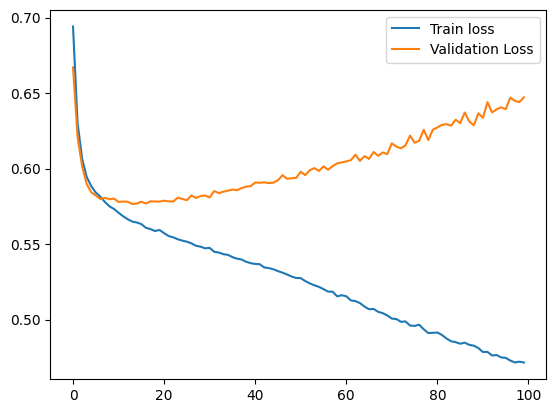

In [7]:
# Utilizando la variable history, la cual utilizamos para guardar el "historial" del entrenamiento
# visualizaremos algunas de las métricas y cómo estas cambiaron mientras se entrenaba el modelo
# Visualizar la pérdida
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend();

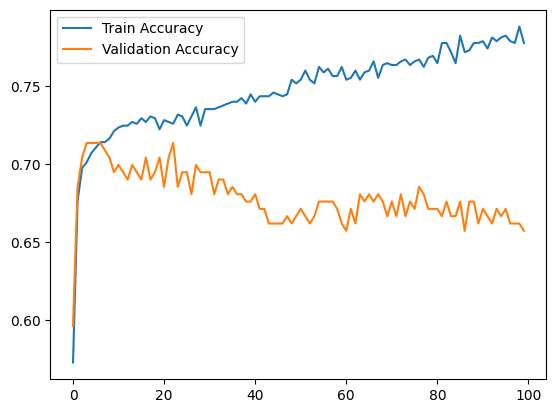

In [8]:
# Visualizar el accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend();

# Regularización $l_1$ y $l_2$

- Las regularización $l_1$ y $l_2$ agregan factores a la función de costo de una red neuronal para impedir que los pesos de esta tomen cualquier valor.
- Para agregar regularización a una capa, se debe utilizar lo siguiente

In [9]:
from tensorflow.keras.regularizers import l2
# Con Regularización l2
# Modelo secuencial
model = Sequential()
# Primera capa oculta
model.add(Dense(19, # Cuántas neuronas tienes en tu primera capa oculta
                input_dim = input_shape, # ¿Cuál es la forma de tus características de entrada (número de columnas)?
                activation = 'relu',
                kernel_regularizer=l2(0.01))) # ¿Qué función de activación estás usando?
model.add(Dense(10, 
                activation = 'relu',
                kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam', metrics=['accuracy'])
history_l2 = model.fit(X_train, y_train,
                    validation_data = (X_val, y_val), 
                    epochs=100)

Epoch 1/100
27/27 [==============================] - 1s 7ms/step - loss: 0.9288 - accuracy: 0.6294 - val_loss: 0.9065 - val_accuracy: 0.6291
Epoch 2/100
27/27 [==============================] - 0s 4ms/step - loss: 0.8760 - accuracy: 0.6812 - val_loss: 0.8650 - val_accuracy: 0.6479
Epoch 3/100
27/27 [==============================] - 0s 4ms/step - loss: 0.8469 - accuracy: 0.7024 - val_loss: 0.8360 - val_accuracy: 0.6667
Epoch 4/100
27/27 [==============================] - 0s 5ms/step - loss: 0.8214 - accuracy: 0.7059 - val_loss: 0.8113 - val_accuracy: 0.6808
Epoch 5/100
27/27 [==============================] - 0s 5ms/step - loss: 0.7998 - accuracy: 0.7153 - val_loss: 0.7917 - val_accuracy: 0.6995
Epoch 6/100
27/27 [==============================] - 0s 6ms/step - loss: 0.7802 - accuracy: 0.7082 - val_loss: 0.7745 - val_accuracy: 0.6901
Epoch 7/100
27/27 [==============================] - 0s 9ms/step - loss: 0.7630 - accuracy: 0.7094 - val_loss: 0.7574 - val_accuracy: 0.6901
Epoch 8/100
2

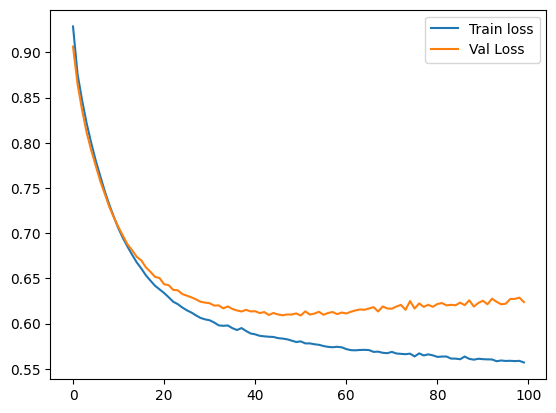

In [10]:
plt.plot(history_l2.history['loss'], label='Train loss')
plt.plot(history_l2.history['val_loss'], label='Val Loss')
plt.legend();

# Dropout

- Un algoritmo sencillo que ha mostrado ser muy efectivo al entrenar redes neuronales
- En cada iteración de entrenamiento, cada neurona (excepto las neuronas de salida) tiene una probabilidad $p$ de ser **excluída** (ignorada).
- La probabilidad $p$ es llamada **tasa de dropout**. Por lo general esta tasa se escoge como:
    - Entre 40%-50% para redes convolucionales
    - Entre 20%-30% para redes recurrentes
    - Para otras redes, se puede escoger valores entre el 10% hasta el 50%

In [11]:
from tensorflow.keras.layers import Dropout
# Con Dropout
# Modelo secuencial
model = Sequential()
# Primera capa oculta
model.add(Dense(19, # Cuántas neuronas tienes en tu primera capa oculta
                input_dim = input_shape, # ¿Cuál es la forma de tus características de entrada (número de columnas)?
                activation = 'relu')) # ¿Qué función de activación estás usando?
# A continuación agregamos nuestra capa de dropout
model.add(Dropout(.3))
model.add(Dense(10, 
                activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam', metrics=['accuracy'])
history_dropout = model.fit(X_train, y_train,
                    validation_data = (X_val, y_val), 
                    epochs=100)

Epoch 1/100
27/27 [==============================] - 2s 7ms/step - loss: 0.7608 - accuracy: 0.5588 - val_loss: 0.6537 - val_accuracy: 0.6432
Epoch 2/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6790 - accuracy: 0.5929 - val_loss: 0.6203 - val_accuracy: 0.6620
Epoch 3/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6626 - accuracy: 0.6165 - val_loss: 0.6064 - val_accuracy: 0.6573
Epoch 4/100
27/27 [==============================] - 0s 6ms/step - loss: 0.6402 - accuracy: 0.6176 - val_loss: 0.6009 - val_accuracy: 0.6432
Epoch 5/100
27/27 [==============================] - 0s 5ms/step - loss: 0.6220 - accuracy: 0.6306 - val_loss: 0.5960 - val_accuracy: 0.6385
Epoch 6/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6161 - accuracy: 0.6671 - val_loss: 0.5914 - val_accuracy: 0.6479
Epoch 7/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6184 - accuracy: 0.6529 - val_loss: 0.5905 - val_accuracy: 0.6526
Epoch 8/100
2

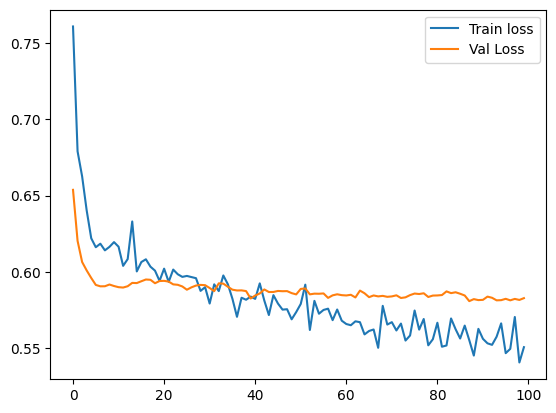

In [12]:
plt.plot(history_dropout.history['loss'], label='Train loss')
plt.plot(history_dropout.history['val_loss'], label='Val Loss')
plt.legend();

# Early stop (detención temprana)

- Para algoritmos iterativos que tienden al overfitting, el early stopping propone dejar de entrenar tan pronto se alcanza el mínimo error. 
- En el ejemplo se ve que el error de validación aumenta en la medida que aumentan los epochs. Early stop mantendrá aquel modelo que entrega el menor error de validación.

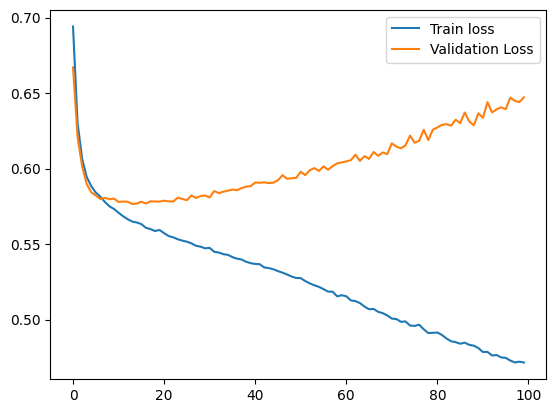

In [13]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend();

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
# Con detención anticipada
# Modelo secuencial
model = Sequential()
# Primera capa oculta
model.add(Dense(19, # Cuántas neuronas tienes en tu primera capa oculta
                input_dim = input_shape, # ¿Cuál es la forma de tus características de entrada (número de columnas)?
                activation = 'relu')) # ¿Qué función de activación estás usando?
model.add(Dense(10, 
                activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam', metrics=['accuracy'])
early_stopping = EarlyStopping(patience = 5) # Número de iteraciones sin mejora antes de parar el entrenamiento
history_earlystop = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=100,
                    callbacks = [early_stopping])

Epoch 1/100
27/27 [==============================] - 1s 9ms/step - loss: 0.6884 - accuracy: 0.6153 - val_loss: 0.5956 - val_accuracy: 0.6617
Epoch 2/100
27/27 [==============================] - 0s 5ms/step - loss: 0.6302 - accuracy: 0.6129 - val_loss: 0.5725 - val_accuracy: 0.6767
Epoch 3/100
27/27 [==============================] - 0s 10ms/step - loss: 0.6108 - accuracy: 0.6282 - val_loss: 0.5631 - val_accuracy: 0.7180
Epoch 4/100
27/27 [==============================] - 0s 6ms/step - loss: 0.5997 - accuracy: 0.6541 - val_loss: 0.5593 - val_accuracy: 0.7293
Epoch 5/100
27/27 [==============================] - 0s 6ms/step - loss: 0.5914 - accuracy: 0.6906 - val_loss: 0.5534 - val_accuracy: 0.7143
Epoch 6/100
27/27 [==============================] - 0s 6ms/step - loss: 0.5842 - accuracy: 0.6976 - val_loss: 0.5497 - val_accuracy: 0.7105
Epoch 7/100
27/27 [==============================] - 0s 4ms/step - loss: 0.5792 - accuracy: 0.6976 - val_loss: 0.5467 - val_accuracy: 0.6992
Epoch 8/100


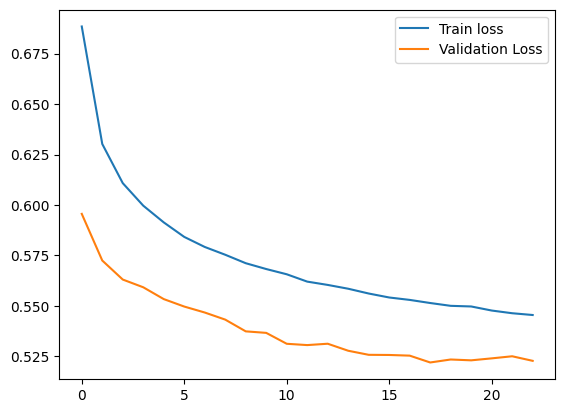

In [15]:
plt.plot(history_earlystop.history['loss'], label='Train loss')
plt.plot(history_earlystop.history['val_loss'], label='Validation Loss')
plt.legend();

# Redes Neuronales Recurrentes (RNN-Recurrent Neural Networks)

- Hasta el momento hemos trabajado con redes FeedForward, donde las activaciones fluyen en una dirección: desde la capa de entrada a la capa de salida.
- Las redes neuronales recurrentes son similares a las redes FeedForward, salvo que también existen conexiones en el sentido inverso.
- Las redes neuronales recurrentes son utilizadas generalmente para procesar secuencias de datos temporalmente relacionados, pues toman en cuenta lo que ocurrió previamente
- Algunas arquitecturas de redes recurrentes:
    - Long Short Term Memory (LSTM)
    - Gated Recurrent Unit (GRU)

# Ejemplo de LSTM

In [1]:
# Dataset de manchas solares disponible en https://github.com/jbrownlee/Datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

df = pd.read_csv('data/sunspots.csv', 
                 index_col = 'Date')
df = df.drop(columns=['id'])
df.rename(columns={'Monthly Mean Total Sunspot Number': 'sunspots'}, inplace=True)
df.head()

2024-01-25 22:09:35.428724: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-25 22:09:35.466908: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-25 22:09:35.466946: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-25 22:09:35.466974: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-25 22:09:35.475482: I tensorflow/core/platform/cpu_feature_g

,sunspots
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7


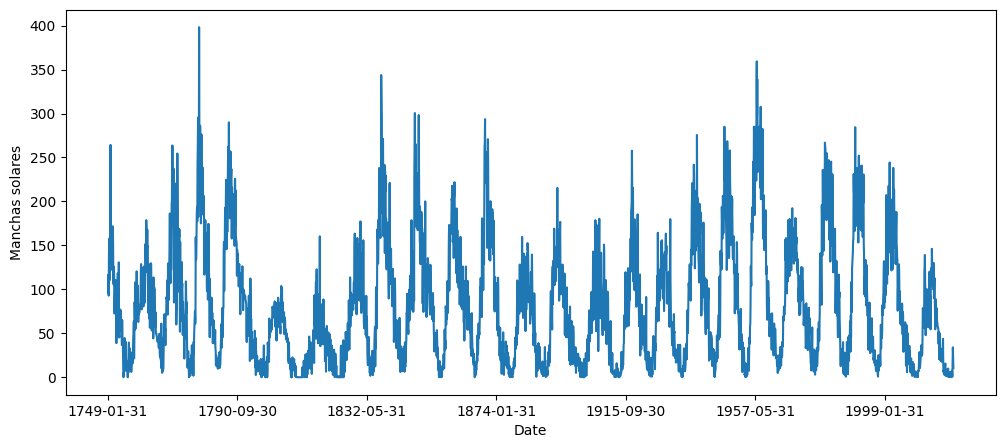

In [3]:
plt.figure(figsize = (12, 5))
df['sunspots'].plot()
plt.ylabel('Manchas solares');

In [4]:
# Division train/test
train_values = np.array(df.loc[:'2016-12-31', 'sunspots'])
test_values = np.array(df.loc['2017-01-31':, 'sunspots'])

# Escalamiento
scaler = MinMaxScaler(feature_range = (0, 1))
train = scaler.fit_transform(train_values.reshape(-1, 1))
test = scaler.transform(test_values.reshape(-1, 1))

# Conversión a datos con tres columnas
from tensorflow.keras.preprocessing import timeseries_dataset_from_array
prev_months = 1
generator = timeseries_dataset_from_array(
    train, # columna de características de entrada
    train, # columna objetivo
    sequence_length=prev_months) # Diferencia en tiempo entre característica y objetivo (en este caso, 1 mes)

2024-01-25 22:09:42.946182: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-25 22:09:42.991698: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-25 22:09:42.991900: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Epoch 1/200


2024-01-25 22:09:47.490680: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8906
2024-01-25 22:09:47.974407: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fa6192a14d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-25 22:09:47.974434: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-01-25 22:09:47.979356: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-01-25 22:09:48.081839: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


26/26 [==============================] - 2s 5ms/step - loss: 0.0450
Epoch 2/200
26/26 [==============================] - 0s 5ms/step - loss: 0.0222
Epoch 3/200
26/26 [==============================] - 0s 5ms/step - loss: 0.0154
Epoch 4/200
26/26 [==============================] - 0s 8ms/step - loss: 0.0133
Epoch 5/200
26/26 [==============================] - 0s 5ms/step - loss: 0.0111
Epoch 6/200
26/26 [==============================] - 0s 5ms/step - loss: 0.0090
Epoch 7/200
26/26 [==============================] - 0s 8ms/step - loss: 0.0070
Epoch 8/200
26/26 [==============================] - 0s 6ms/step - loss: 0.0051
Epoch 9/200
26/26 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 10/200
26/26 [==============================] - 0s 5ms/step - loss: 0.0022
Epoch 11/200
26/26 [==============================] - 0s 5ms/step - loss: 0.0013
Epoch 12/200
26/26 [==============================] - 0s 6ms/step - loss: 6.7042e-04
Epoch 13/200
26/26 [=========================

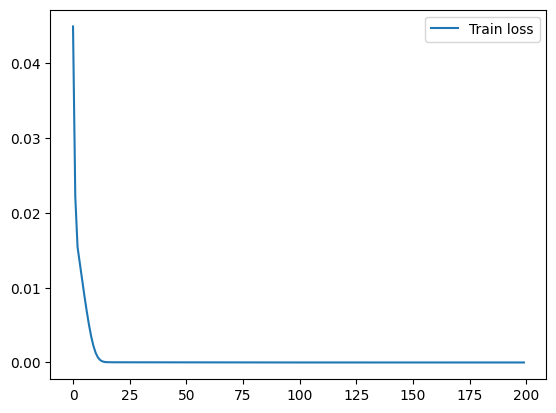

In [5]:
# Modelo secuencial
model = Sequential()
# Capa LSTM
model.add(LSTM(units = 50, 
               return_sequences = False # True si la siguiente capa será una capa recurrente
               ))
# Capa de salida
model.add(Dense(units = 1, activation = 'relu'))

# Compilado
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

history_lstm = model.fit(generator, epochs=200) # el generador creará los datos en cada iteración

plt.plot(history_lstm.history['loss'], label='Train loss')
plt.legend()

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# testing
full = np.concatenate((train, test))
test_days = pd.DataFrame(full)[len(full) - len(test) - prev_months:].values
generator_test = timeseries_dataset_from_array(
    test_days,
    test_days,
    sequence_length=prev_months)

# Predicciones
preds = model.predict(generator_test)

1/1 [==============================] - 0s 297ms/step


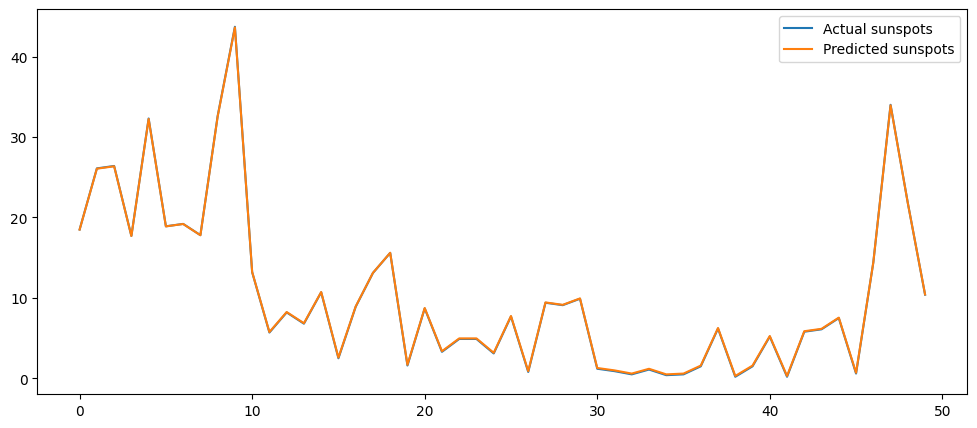

In [8]:
plt.figure(figsize = (12, 5))
plt.plot(scaler.inverse_transform(test_days), label='Actual sunspots')
plt.plot(scaler.inverse_transform(preds), label='Predicted sunspots')
plt.legend()

# Redes Neuronales Convolucionales (CNN-Convolutional Neural Networks)

- Así como las redes neuronales recurrentes permiten procesar datos temporalmente relacionados, las redes neuronales convolucionales permiten procesar datos espacialmente relacionados.
- Este tipo de redes son utilizadas generalmente para procesar imágenes, donde los pixeles están relacionados espacialmente entre sí.
- En las redes convolucionales, generalmente se utilizan **capas de pooling**. Estas capas se utilizan para reducción de dimensionalidad, disminuyendo la redundancia de datos existente en imágenes (pixeles cercanos generalmente están altamente correlacionados).

In [9]:
# Ejemplo, fuente https://www.tensorflow.org/tutorials/images/cnn
# Bibliotecas
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

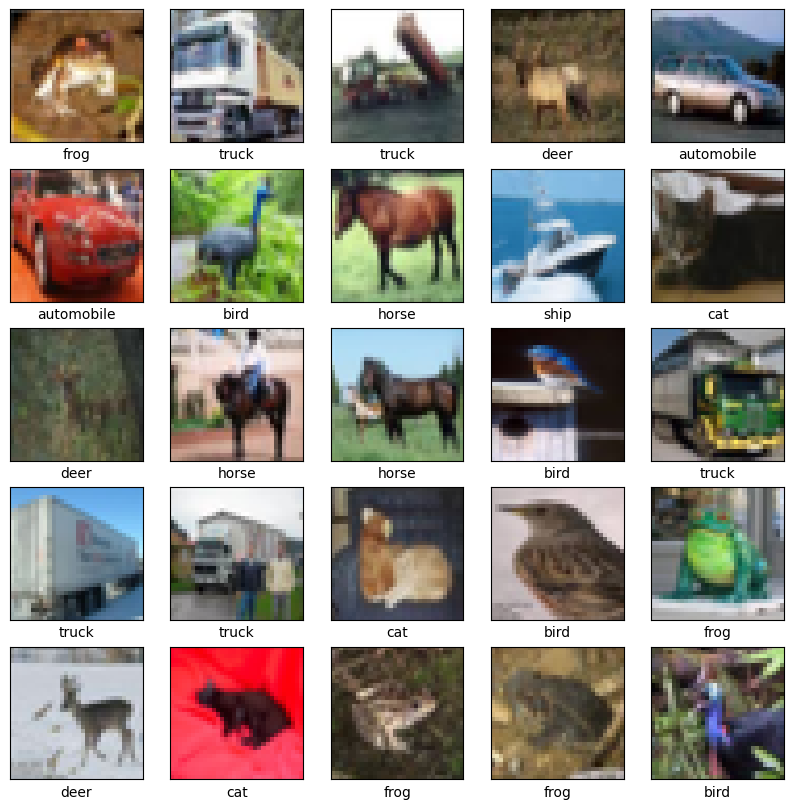

In [10]:
# Datos
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [11]:
train_images.shape

(50000, 32, 32, 3)

In [12]:
# Creación de modelo
model = models.Sequential()
# Capas encargadas de obtener información de la imagen
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Capas para la clasificación en base a la información obtenida en 
# capas anteriores
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_cnn = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 11s 6ms/step - loss: 1.5045 - accuracy: 0.4519 - val_loss: 1.2405 - val_accuracy: 0.5575
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1527 - accuracy: 0.5913 - val_loss: 1.1371 - val_accuracy: 0.6044
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0093 - accuracy: 0.6448 - val_loss: 0.9671 - val_accuracy: 0.6577
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9090 - accuracy: 0.6797 - val_loss: 0.9597 - val_accuracy: 0.6635
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8413 - accuracy: 0.7036 - val_loss: 0.8975 - val_accuracy: 0.6858
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7834 - accuracy: 0.7254 - val_loss: 0.9064 - val_accuracy: 0.6878
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7317 - accuracy: 0.7436 - val_loss: 0.8795 - val_accuracy

313/313 - 0s - loss: 0.9082 - accuracy: 0.6965 - 439ms/epoch - 1ms/step


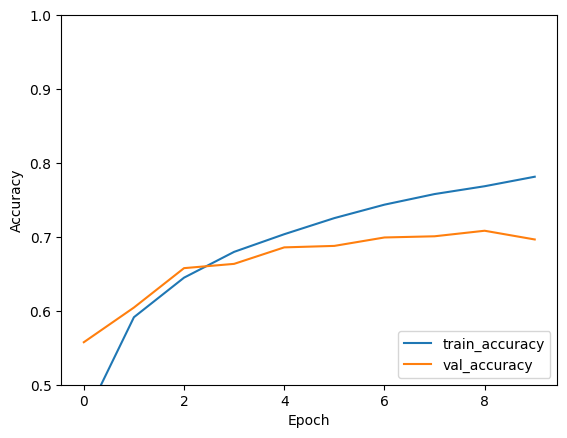

In [14]:
plt.plot(history_cnn.history['accuracy'], label='train_accuracy')
plt.plot(history_cnn.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

# Actividad 9

- Descargue y analice el dataset presente en el siguiente enlace de Kaggle: https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/data
- Cree un modelo capaz de reconocer si una foto corresponde a la foto de un gato o un perro. Para ello, compare distintos modelos y quédese con aquel con mejor desempeño.

In [ ]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")
#codigo extra, para que imagenes de matplotlib
#estén centradas en las diapositivas, ejecutar antes de lanzar los ejemplos.